In [1]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

from skimage import io, transform

import os, glob

import os
#import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow


In [3]:
train_images = glob.glob("fingers/train/*.png")
test_images = glob.glob("fingers/test/*.png")
print(len(train_images),
     len(test_images), sep = '\n')

6000
1200


In [37]:
train_images

['fingers/train/e0819dc2-9497-4e92-9798-c2b854a4a5c4_5R.png',
 'fingers/train/59bbc4bb-3f59-4c64-801f-bc7d938a30bd_0R.png',
 'fingers/train/9b501558-b8c5-4e40-880b-20277a6c1d49_5L.png',
 'fingers/train/5c797037-bea1-4ca2-8b69-c1838f9b450a_0L.png',
 'fingers/train/d4f56865-fbdf-482a-9b46-989593929d0c_0R.png',
 'fingers/train/5ff0ab61-d821-4da6-898b-2bc47456c6f0_0R.png',
 'fingers/train/8fa427f1-d48a-462a-9c01-45bfc3197916_0L.png',
 'fingers/train/653c98fb-fd7b-44eb-955d-503a535eb8c8_5L.png',
 'fingers/train/7d32823b-7c93-4b4f-970d-eb73cc916c02_0L.png',
 'fingers/train/9b7c11a4-1c71-479d-89f3-1e016b377880_0R.png',
 'fingers/train/9f230a73-f1ff-49e7-8ecf-76e568d9acbe_0R.png',
 'fingers/train/8db2b88e-4a73-4034-b966-78874a02a700_0R.png',
 'fingers/train/5898e6e6-1942-4984-a664-48398bbc8b8a_0L.png',
 'fingers/train/20257308-a833-4ee5-814a-999ac19ddf21_5L.png',
 'fingers/train/6d6581fd-28fa-4c33-8260-b4b4a385e2b8_0L.png',
 'fingers/train/611586a8-3671-4b22-af26-b7a26c3d8130_5L.png',
 'finger

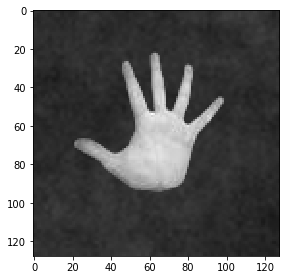

In [11]:
tes=io.imread(train_images[2])
io.imshow(tes)

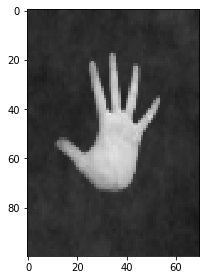

In [15]:
tes2=transform.resize(tes,(100,70),mode='constant')
io.imshow(tes2)

In [82]:
X_train = []
X_test = []
y_train = []
y_test = []
    
for img in train_images:
    img_read = io.imread(img)
    # Most images are already of size (128,128) but it is always better to use 64,64 for less time computing
    #for better accuracy change (64,64) with (128,128)
    img_read = transform.resize(img_read, (90,60), mode = 'constant')
    X_train.append(img_read)
    # The info about the number of fingers and the fact that this is a right or left hand is in two characters of the path
    y_train.append(img[-6:-5])
    
for img in test_images:
    img_read = io.imread(img)
    img_read = transform.resize(img_read, (90,60), mode = 'constant')
    X_test.append(img_read)
    y_test.append(img[-6:-5])

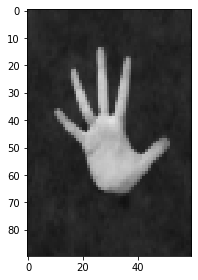

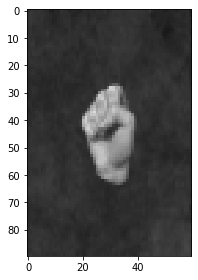

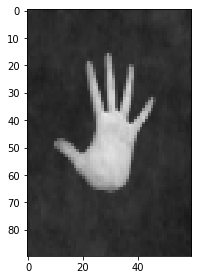

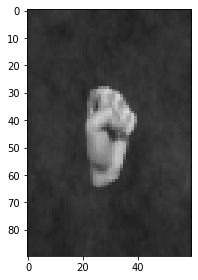

In [27]:
io.imshow(X_train[0])
plt.show()
io.imshow(X_train[1])
plt.show()
io.imshow(X_train[2])
plt.show()
io.imshow(X_train[3])
plt.show()

In [26]:
type(X_train)

list

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [30]:
X_train.shape

(6000, 90, 60)

In [94]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [83]:
type(y_train)
label_to_int={'0' : 0,'5': 1}
temp = []

In [105]:
temp=[]
for label in y_train:
    temp.append(label_to_int[label])
y_train2 = temp.copy()

temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test2 = temp.copy()

In [66]:
##y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes = 2)
##y_test =tensorflow.keras.utils.to_categorical(y_test, num_classes =2)


In [110]:
y_train3=np.array(y_train2)
y_test3=np.array(y_test2)

In [103]:
type(y_train2)
y_train2=[float(i) for i in y_train2]
y_test2=[float(i) for i in y_test2]

In [115]:
weight_decay = 1e-4

num_classes = 2

model = Sequential()

model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(90,60,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


 
model.add(Flatten())
model.add(Dense(64, activation="linear"))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(0.0003), metrics=['accuracy'])
 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 90, 60, 64)        1088      
_________________________________________________________________
activation_49 (Activation)   (None, 90, 60, 64)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 90, 60, 64)        256       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 90, 60, 64)        65600     
_________________________________________________________________
activation_50 (Activation)   (None, 90, 60, 64)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 90, 60, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 45, 30, 64)       

In [ ]:
model.fit(x = X_train,y = np.array(y_train3), batch_size=50, validation_data = (X_test,np.array(y_test3)), epochs =2)

In [112]:
model.save('mymodel2.h5')
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
